<a href="https://colab.research.google.com/github/Isha05dew/06_chai-backend/blob/main/Build_an_ai_that_can_see_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ishadewangan","key":"84c42db05116b36d98a8bad9c4be9801"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


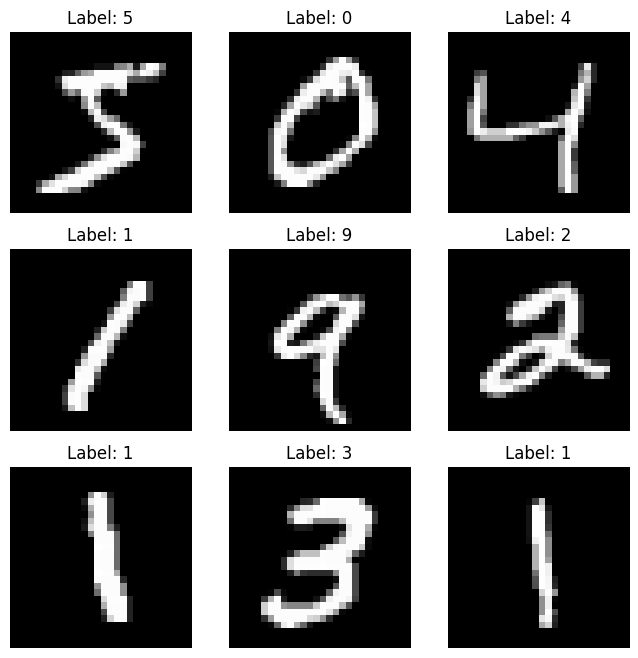

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


# DAY - 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Conv2D - detects pattern in the images
### MaxPooling2D - shorten images(focus on main imp part)
### Flatten - convert 2d images into 1d images
### Dense - connect layers and predict output

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9043 - loss: 0.3216 - val_accuracy: 0.9821 - val_loss: 0.0620
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9850 - loss: 0.0473 - val_accuracy: 0.9839 - val_loss: 0.0545
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9894 - loss: 0.0304 - val_accuracy: 0.9887 - val_loss: 0.0354
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9898 - val_loss: 0.0359
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9960 - loss: 0.0130 - val_accuracy: 0.9902 - val_loss: 0.0361


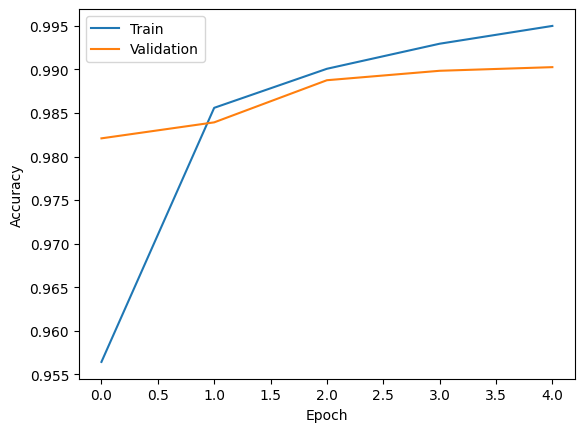

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(X_test, y_test)
print(f"Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9888 - loss: 0.0403
Test Accuracy:0.9908
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Day 3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,y_train_c10,batch_size=32), epochs=10, validation_data=(X_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 72ms/step - accuracy: 0.3404 - loss: 1.7856 - val_accuracy: 0.5177 - val_loss: 1.3365
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 73ms/step - accuracy: 0.5228 - loss: 1.3405 - val_accuracy: 0.6001 - val_loss: 1.1364
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 71ms/step - accuracy: 0.5778 - loss: 1.1977 - val_accuracy: 0.5931 - val_loss: 1.1679
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 72ms/step - accuracy: 0.6080 - loss: 1.1228 - val_accuracy: 0.5806 - val_loss: 1.2852
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 71ms/step - accuracy: 0.6302 - loss: 1.0634 - val_accuracy: 0.6314 - val_loss: 1.0885
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.6506 - loss: 1.0049 - val_accuracy: 0.6664 - val_loss: 0.9928
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.6606 - loss: 0.9800 - val_accuracy: 0.6358 - val_loss: 1.0717
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.6684 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.80      0.56      0.66      1000
           1       0.87      0.75      0.80      1000
           2       0.80      0.28      0.41      1000
           3       0.62      0.26      0.37      1000
           4       0.62      0.54      0.58      1000
           5       0.72      0.42      0.53      1000
           6       0.51      0.89      0.65      1000
           7       0.58      0.79      0.67      1000
           8       0.76      0.73      0.74      1000
           9       0.43      0.94      0.59      1000

    accuracy                           0.61     10000
   macro avg       0.67      0.61      0.60     10000
weighted avg       0.67      0.61      0.60     10000



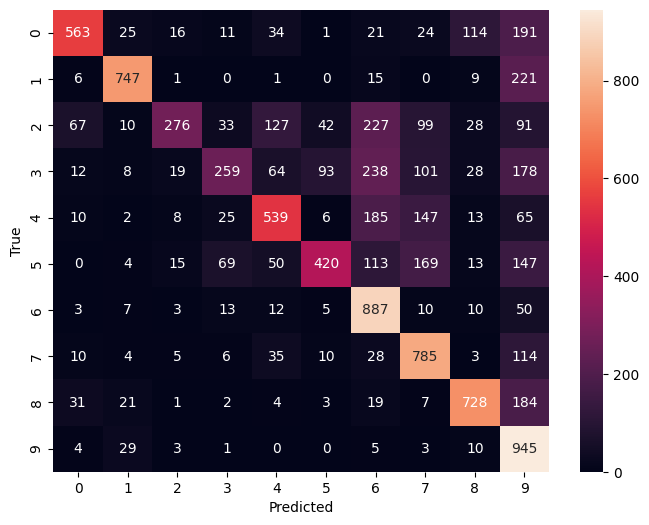

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10, y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Day-4

### Pretrained Model-already trained on the large datasets like MobileNetV2, ResNet,VGG,imageNet
### What is Transfer Learning?
### How to Fine-Tune and Optimize?
### How to Deploy a Model?

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 210M/218M [00:00<00:00, 552MB/s] 
100% 218M/218M [00:00<00:00, 592MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


Found 8023 images belonging to 2 classes.
Found 8023 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet',include_top=False, input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model, GlobalAveragePooling2D(), Dense(128,activation='relu'), Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.7878 - loss: 0.5504 - val_accuracy: 0.7982 - val_loss: 0.5017
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.8002 - loss: 0.5000 - val_accuracy: 0.7982 - val_loss: 0.4825
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.7941 - loss: 0.4951 - val_accuracy: 0.7987 - val_loss: 0.4666
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 619s 2s/step - accuracy: 0.8001 - loss: 0.4711 - val_accuracy: 0.8074 - val_loss: 0.4434
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - accuracy: 0.8012 - loss: 0.4549 - val_accuracy: 0.8209 - val_loss: 0.4108


In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy', metrics=['accuracy']
              )
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1819s 7s/step - accuracy: 0.8030 - loss: 0.4735 - val_accuracy: 0.8262 - val_loss: 0.4043
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1801s 7s/step - accuracy: 0.8018 - loss: 0.4518 - val_accuracy: 0.8299 - val_loss: 0.3973
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1844s 7s/step - accuracy: 0.8058 - loss: 0.4224 - val_accuracy: 0.8357 - val_loss: 0.3882


In [ ]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')
#Check file in the directory

251/251 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step


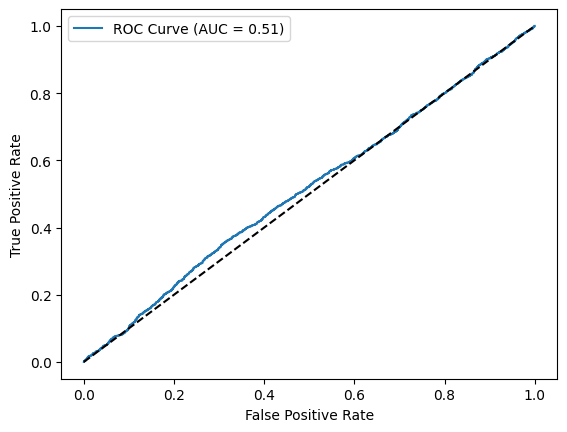

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba=loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Day-5

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'dog.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving SAVE_20250811_204006.jpg to SAVE_20250811_204006 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted class: Dog


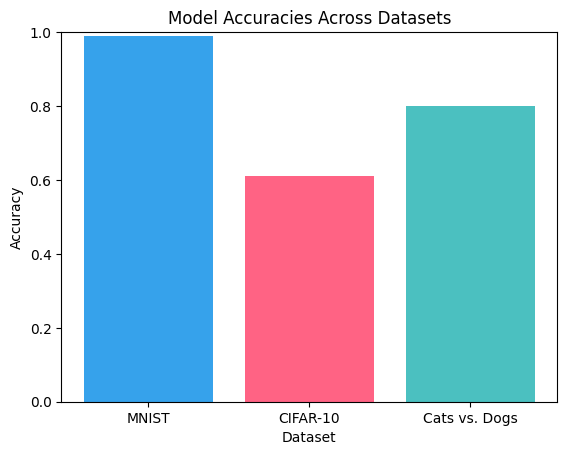

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.99, 0.61, 0.80]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()